As a first step, the names of all characters of the show [South Park](https://en.wikipedia.org/wiki/South_Park) are gathered. They are saved in a pandas DataFrame, with the name in the first column `['name']` and each character's wikilink in the second column `['wikilink']`. The associated text is also stored in subsequent columns. The DataFrame is pickled finally pickled. To this end, the Wikipedia article [List of South Park characters](https://en.wikipedia.org/wiki/List_of_South_Park_characters) is used.

In [92]:
# Imports
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import json
import pickle
import requests
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import re

In [List of South Park characters](https://en.wikipedia.org/wiki/List_of_South_Park_characters), the following sections list the characters and their links, alongside some character synopsis for some of the characters:  
- Main characters  
- Secondary characters  
- Recurring characters  
  - Significant characters (in table format)  
  - Other characters (in table format)  
- Former characters (characters that are either killed or retired, in table format)  

Since there are many links inside also the descriptions, beautiful soup will be used to get the aforementioned parts.

In [93]:
# Wikipedia url that contains all the characters
wiki_url = 'https://en.wikipedia.org/wiki/List_of_South_Park_characters'

# Get raw html page
raw_html = requests.get(wiki_url)

# Use bs4 to prettify and make easier to find sections
soup = BeautifulSoup(raw_html.text, 'html.parser')

In [94]:
for article in soup.find_all('div', class_='mw-parser-output'):
    headline = article.find_all('h3')
    for head in headline:
        print(head)
    


<h3><span class="mw-headline" id="Cast">Cast</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_South_Park_characters&amp;action=edit&amp;section=2" title="Edit section: Cast">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<h3><span class="mw-headline" id="Stan_Marsh">Stan Marsh</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_South_Park_characters&amp;action=edit&amp;section=4" title="Edit section: Stan Marsh">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<h3><span class="mw-headline" id="Kyle_Broflovski">Kyle Broflovski</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_South_Park_characters&amp;action=edit&amp;section=5" title="Edit section: Kyle Broflovski">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<h3><span class="mw-headline

In [95]:
for article in soup.find_all('div', class_='hatnote'):
    print(article.prettify())

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Stan_Marsh" title="Stan Marsh">
  Stan Marsh
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Kyle_Broflovski" title="Kyle Broflovski">
  Kyle Broflovski
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Eric_Cartman" title="Eric Cartman">
  Eric Cartman
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Kenny_McCormick" title="Kenny McCormick">
  Kenny McCormick
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Butters_Stotch" title="Butters Stotch">
  Butters Stotch
 </a>
</div>

<div class="hatnote navigation-not-searchable" role="note">
 Main article:
 <a href="/wiki/Randy_and_Sharon_Marsh" title="Randy and Sharon Marsh">
  Randy and Sharon Marsh
 </a>
</div>

<div class="hatn

Use [fandom](https://southpark.fandom.com/wiki/Category:Characters)

In [96]:
chars_url = 'https://southpark.fandom.com/wiki/Portal:Characters'
raw_html = requests.get(chars_url)

soup = BeautifulSoup(raw_html.text, 'html.parser')

In [97]:
# Create the base url that is combined with
# each characters; unique url
base_url = 'https://southpark.fandom.com'

In [98]:
# Initiate a dictionary for each character and its link
chars_dict = {}

In [99]:
for char_letter in soup.find_all('div', class_='wikia-gallery'):
    characters = char_letter.find_all('div', class_='lightbox-caption')
    for character in characters:
        char_name = character.text
        if char_name not in list(chars_dict.keys()): # Avoid duplicates due to trending characters on top of page
            chars_dict[char_name] = base_url+character.a['href']

Now that I have all the characters links, I create a `pandas` DataFrame from it.

In [100]:
characters_df = pd.DataFrame.from_dict( {'name':chars_dict.keys(), 'link':chars_dict.values()} )

# Set the index to be the name column for ease of use later
characters_df_nameidx =  characters_df.set_index('name')

In [101]:
characters_df.head(5)

,name,link
0,Eric Cartman,https://southpark.fandom.com/wiki/Eric_Cartman
1,Kenny McCormick,https://southpark.fandom.com/wiki/Kenny_McCormick
2,Kyle Broflovski,https://southpark.fandom.com/wiki/Kyle_Broflovski
3,Stan Marsh,https://southpark.fandom.com/wiki/Stan_Marsh
4,A 34-Year-Old Asian Man Who Looks Strikingly S...,https://southpark.fandom.com/wiki/A_34-Year-Ol...


In [102]:
print(f"There are {characters_df.shape[0]} characters")

There are 2056 characters


In [103]:
characters_df_nameidx.head(5)

,link
name,
Eric Cartman,https://southpark.fandom.com/wiki/Eric_Cartman
Kenny McCormick,https://southpark.fandom.com/wiki/Kenny_McCormick
Kyle Broflovski,https://southpark.fandom.com/wiki/Kyle_Broflovski
Stan Marsh,https://southpark.fandom.com/wiki/Stan_Marsh
A 34-Year-Old Asian Man Who Looks Strikingly Similar to Ricardo Montalbán,https://southpark.fandom.com/wiki/A_34-Year-Ol...


Also create a column that stores the first name of the characters. The major ones are called by their first names. I do not care if I miss some secondary ones.

In [104]:
characters_df_nameidx[:]

,link
name,
Eric Cartman,https://southpark.fandom.com/wiki/Eric_Cartman
Kenny McCormick,https://southpark.fandom.com/wiki/Kenny_McCormick
Kyle Broflovski,https://southpark.fandom.com/wiki/Kyle_Broflovski
Stan Marsh,https://southpark.fandom.com/wiki/Stan_Marsh
A 34-Year-Old Asian Man Who Looks Strikingly Similar to Ricardo Montalbán,https://southpark.fandom.com/wiki/A_34-Year-Ol...
...,...
6th Grader with Yellow Shirt and Brown Pants,https://southpark.fandom.com/wiki/6th_Grader_w...
911 Operator,https://southpark.fandom.com/wiki/911_Operator
911 Truth Webmaster,https://southpark.fandom.com/wiki/911_Truth_We...


In [105]:
# characters_df_nameidx['name'].apply(lambda x: x.split(' ', 1)[0] if len(x.split(" "))<3 else x)

In [106]:
characters_df_nameidx['first_name'] = characters_df['name'].apply(lambda x: x.split(' ', 1)[0] if len(x.split(" "))<3 else x)

In [107]:
characters_df_nameidx.head()

,link,first_name
name,,
Eric Cartman,https://southpark.fandom.com/wiki/Eric_Cartman,NaN
Kenny McCormick,https://southpark.fandom.com/wiki/Kenny_McCormick,NaN
Kyle Broflovski,https://southpark.fandom.com/wiki/Kyle_Broflovski,NaN
Stan Marsh,https://southpark.fandom.com/wiki/Stan_Marsh,NaN
A 34-Year-Old Asian Man Who Looks Strikingly Similar to Ricardo Montalbán,https://southpark.fandom.com/wiki/A_34-Year-Ol...,NaN


In [108]:
characters_df_nameidx.loc[characters_df_nameidx.index=='Jerome "Chef" McElroy']

,link,first_name
name,,
"Jerome ""Chef"" McElroy",https://southpark.fandom.com/wiki/Jerome_%22Ch...,NaN


Now that we have a pandas dataframe, we can add columns with the text of each character. The text is added by getting it from the corresponding character's link.

In [109]:
def get_char_text_fandom2(character_url):
    source_action = '?action=edit'
    url = character_url + source_action
    raw_html = requests.get(url)
    
    soup = BeautifulSoup(raw_html.text, 'html.parser')
    txt_box = soup.find_all('textarea', id='wpTextbox1')
    try:
        txt_box = txt_box[0]
    except IndexError as e:
        print(e)
        print(character_url)
        return ''
    
    char_txt = ''
    
    # The short bio
    pattern = r"[']{3}\s{1}([^=]+)[=]{2}"
    matches = re.findall(pattern, txt_box.text)
    
    for match in matches:
        char_txt += match
    
    # All the rest
    pattern = r'[=]{2}\n([^<=\{\}*]+)'
    matches = re.findall(pattern, txt_box.text)
    
    for match in matches:
        char_txt += match
    
    return char_txt

In [110]:
def get_list_of_link_titles2(char_text, character_list):
    link_list = []
    pattern = r"[\[]{2}([^\|\]]+)\|{1}"
    matches = re.findall(pattern, char_text)
    
    if matches:
        for match in matches:
            if match in character_list:
                link_list.append(match)    
    
    return link_list

In [111]:
def get_char_text_fandom(soup_obj):
    char_txt = ''
    for part in soup_obj.find_all('div', class_='mw-parser-output'):
        paras = part.find_all('p')
        for para in paras[2:]:
            char_txt+=para.text
    
#     lsts = part.find_all('ul')
#     for lst in lsts:
#         print(lst.text)
#         print('-'*60)  
        
        return char_txt

In [112]:
def get_list_of_link_titles(soup_obj):
    link_list = []
    for part in soup_obj.find_all('div', class_='mw-parser-output'):
        ps = part.find_all('p')
        for p in ps:
            links = p.find_all('a')
            for link in links:
                try:
                    link_list.append(link['title'])
                except KeyError as e:
                    pass           
    return link_list

In [114]:
try:
    characters_df_nameidx = pd.read_csv('characters_df_large.csv')

except FileNotFoundError as e:
    print(e)
    print('Generating character dataframe...')    

    for character in tqdm(characters_df_nameidx.index.to_list()):
        # Get characters url page
        char_url = characters_df_nameidx.loc[character, 'link']
            
        # Get the cleaned version of its text
        char_text = requests.get(char_url)
        soup = BeautifulSoup(char_text.text, 'html.parser')
        txt = get_char_text_fandom2(char_url)

        # Store it in the dataframe under a new column, with fandom included in its name
        characters_df_nameidx.loc[character, 'fandom_text'] = txt

        # Get the link list of each character
        link_lst = get_list_of_link_titles2(txt, characters_df_nameidx.index.to_list())

        # Store it in the dataframe under a new column
        characters_df_nameidx.at[character, 'links_list'] = link_lst


#     SAVE = True

#     if SAVE:
#         with open('characters_df.pickle', 'wb') as f:
#             pickle.dump(characters_df_nameidx, f)

[Errno 2] No such file or directory: 'characters_df.pickle'
Generating character dataframe...


  0%|          | 0/2056 [00:00<?, ?it/s]

list index out of range
https://southpark.fandom.com/wiki/Yo_Gabba_Gabba#Brobee
list index out of range
https://southpark.fandom.com/wiki/Yo_Gabba_Gabba#Foofa
list index out of range
https://southpark.fandom.com/wiki/Yo_Gabba_Gabba#Muno
list index out of range
https://southpark.fandom.com/wiki/Yo_Gabba_Gabba#Plex
list index out of range
https://southpark.fandom.com/wiki/Yo_Gabba_Gabba#Toodee


In [115]:
characters_df_nameidx.to_csv('characters_df_large.csv')

In [116]:
txt = characters_df_nameidx.loc[characters_df_nameidx.index=='McNuggets'].fandom_text
txt = txt.to_list()[0]
print(txt)

is a young cornish rooster that plays ''[[Magic: The Gathering (CCG)]]'' who appears in the [[Season Eighteen]] episode, "[[Cock Magic]]".

McNuggets was a rooster selected by [[The Boys|the boys]] as their rooster for playing underground ''Magic: The Gathering'', after [[Kenny McCormick]] found himself displeased by the use of roosters being forced to play the game for human amusement. He was named by [[Eric Cartman]], who, along with [[Kyle Broflovski]] and [[Stan Marsh]], convinced Kenny to take him. Soon, McNuggets finds himself in ''Magic: The Gathering'' competition, first defeating another rooster, Reuben. However, upon reaching the big leagues at the [[Panda Express]], McNuggets is too scared to play against Gadnuk, Breaker of Worlds, a feared and revered rooster. Being unable to forfeit the game, Kenny steps in and plays Gadnuk in McNuggets' place, nearly defeating him until the police come and break up the game. McNuggets then goes on to play a combination game of ''Magic: Th

In [117]:
char_url = characters_df_nameidx.loc['Randy Marsh', 'link']

# Get the cleaned version of its text
char_text = requests.get(char_url)
soup = BeautifulSoup(char_text.text, 'html.parser')
txt = get_char_text_fandom(soup)

In [118]:
txt = get_char_text_fandom2(char_url)

print(txt)

is the son of [[Marvin Marsh|Marvin]] and [[Grandma Marsh]], the husband of [[Sharon Marsh|Sharon]], and the father of [[Stan Marsh|Stan]] and [[Shelley Marsh|Shelley]]. He makes his debut in the [[Season One]] episode "[[Volcano]]" and is voiced by [[Trey Parker]].

Despite being a geologist with a doctorate, he is generally portrayed as an absent-minded idiot, driving many episode plots in the later seasons, though this was later revealed to be due to him being unhappy over his marriage. However, in earlier seasons he was calmer and more level-headed, often providing advice to the boys. In "[[You're Getting Old]]", he divorced his wife and moved away. However, in "[[Ass Burgers]]" he reconciled with Sharon and remarried, therefore getting their old house back. In [[Season Twenty-Two]], Randy founded the [[Tegridy Farms (Location)|Tegridy Farms]] hemp farming business, before returning to his geologist job in ''[[South Park: The Streaming Wars Part 2]]''.

Randy is named after and bas

In [119]:
get_list_of_link_titles2(txt, characters_df_nameidx.index.to_list())

['Marvin Marsh',
 'Sharon Marsh',
 'Stan Marsh',
 'Shelley Marsh',
 'Barack Obama',
 'Eric Cartman',
 'Kenny McCormick',
 'Mongolians',
 'Rebecca Turnod',
 'Stan Marsh',
 'Jerome "Chef" McElroy',
 'Butters Stotch',
 'Future Stan',
 'Eric Cartman',
 'Goth Kids',
 'Butters Stotch',
 'Kyle Broflovski',
 'Ike Broflovski',
 'Shelley Marsh',
 'Visitors',
 'Mr. Slave']

Now that I have some initial text data for each character, I can start forming a network. But the difficulty lies in the fact that in the text, only the first names or their variations are shown. There is also the case of words such as `boys`, which refer to the characters `Kyle`, `Stan`, `Eric` and `Kenny`, if the latter is still alive. This case is difficult to discover. Moreover, there is a case where a girl is called `Red`, as well as an adult. From fandom, the links can also be searched for interactions, since the first time a character is mentioned, it is linked.

In [120]:
import networkx as nx

In [121]:
G = nx.DiGraph()

In [122]:
G.add_nodes_from(chars_dict.keys())

Now that the network has been created, each text can be parsed and add the edges, in a directed manner. To this end, the following function is defined:

In [123]:
for character in tqdm(characters_df_nameidx.index.to_list()):
    for link in characters_df_nameidx.loc[character, 'links_list']:
        if link in characters_df_nameidx.index.to_list():
            if link != character:
                G.add_edge(character, link)

  0%|          | 0/2056 [00:00<?, ?it/s]

In [124]:
import numpy as np

In [125]:
out_degrees = np.array([deg for (node, deg) in G.out_degree])
in_degrees = np.array([deg for (node, deg) in G.in_degree])

Identify the weakly connected characters, that might not be formally part of stories.

In [126]:
G_weak = nx.weakly_connected_components(G)

In [127]:
# See who are in the weakly connected components
i=0
for el in G_weak:
    if i==0:
        print(len(el))
    else:
        print(len(el), ' : ', list(el))        
    i+=1

1184
1  :  ['A 34-Year-Old Asian Man Who Looks Strikingly Similar to Ricardo Montalbán']
2  :  ['Mr. Hagen', 'Aaron Hagen']
1  :  ['Adam Sandler']
1  :  ['Adams County Pee-Wee Hockey Team']
1  :  ['Afro Ninja']
1  :  ['Agent Fields']
1  :  ['Agent Tucker']
1  :  ['Air Israel Handler']
1  :  ["Al Gore's Secret Service Agents"]
1  :  ['Al-Qaeda']
1  :  ['Al Pacino']
1  :  ['Alec Baldwin']
1  :  ['Alec Vaughn']
1  :  ['Alex Glick']
1  :  ['Alexa']
1  :  ['Ali Khamenei']
3  :  ['Homeless Merchant', 'Homeless People', 'Alien Conspiracy Hobo']
1  :  ['Alien Pilots']
1  :  ['Allen Ginsberg']
1  :  ['Allen Varcas']
1  :  ['Alois and Klara Hitler']
1  :  ['Amanda']
1  :  ['Ambassador of Humans']
1  :  ['Anchorman']
1  :  ['Angela Merkel']
1  :  ['Angus T. Jones']
1  :  ['Ann Curry']
1  :  ['Anonymous821']
2  :  ['Father and Handicapped Daughter', 'Anthony Webster']
1  :  ['Apu Nahasapeemapetilon']
1  :  ['Archangel Michael']
1  :  ['Arturo Gatti']
1  :  ['Aslan the Lion']
1  :  ['Aunt Jemima']


The characters in the small clusters (or alone) are characters that are not connected to the main cahracters. Some are refereed, as presenters, mailman, etc. So we can remove them.

In [128]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
G_weakly_con = G.subgraph(list(largest_cc))

In [129]:
print(f"Number of nodes in maximum length weakly connected subgraph: {len(list(G_weakly_con.nodes))}")
print(f"Number of edges in maximum length weakly connected subgraph: {len(list(G_weakly_con.edges))}")

Number of nodes in maximum length weakly connected subgraph: 1184
Number of edges in maximum length weakly connected subgraph: 2641


We can plot the in and oout degree distributions for the Graph of the max-len weakly connected component

In [130]:
# Find the degrees distribution
# Numpy version of degrees only since it is more convenient to use
in_degrees = np.array([deg for (node, deg) in G_weakly_con.in_degree])
out_degrees = np.array([deg for (node, deg) in G_weakly_con.out_degree])

# Dictionary to also find characters:
in_degrees_dict = {node:deg for (node, deg) in G_weakly_con.in_degree}
out_degrees_dict = {node:deg for (node, deg) in G_weakly_con.out_degree}

# Visualize degrees distribution, using histograms
v_in = np.arange(in_degrees.min(), in_degrees.max()+1, 1)
hist_in, edges_in = np.histogram(in_degrees, bins=v_in)

v_out = np.arange(out_degrees.min(), out_degrees.max()+1, 1)
hist_out, edges_out = np.histogram(out_degrees, bins=v_out)

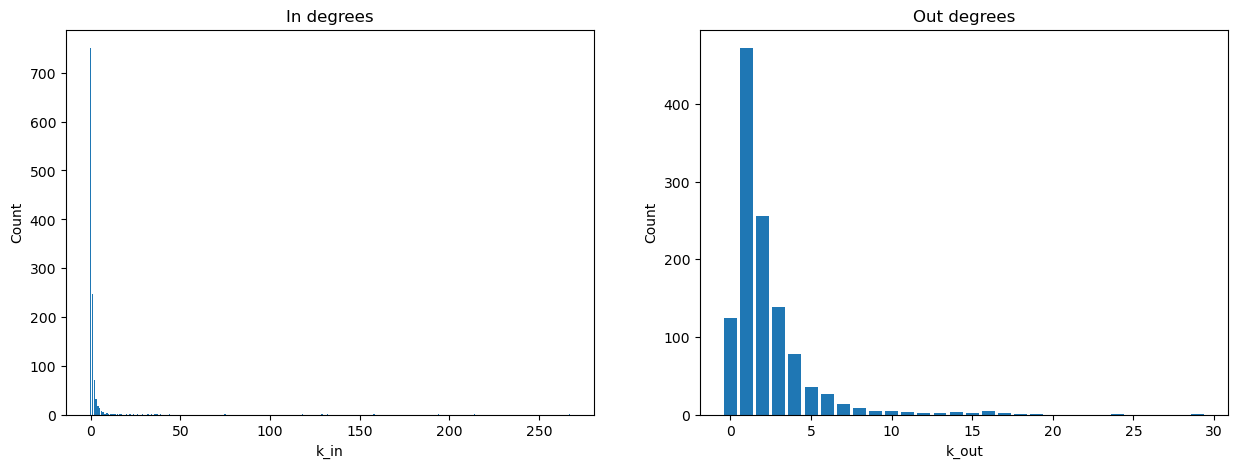

In [131]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(edges_in[:-1], hist_in)
plt.title('In degrees')
plt.xlabel('k_in')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.bar(edges_out[:-1], hist_out)
plt.title('Out degrees')
plt.xlabel('k_out')
plt.ylabel('Count')

plt.show()

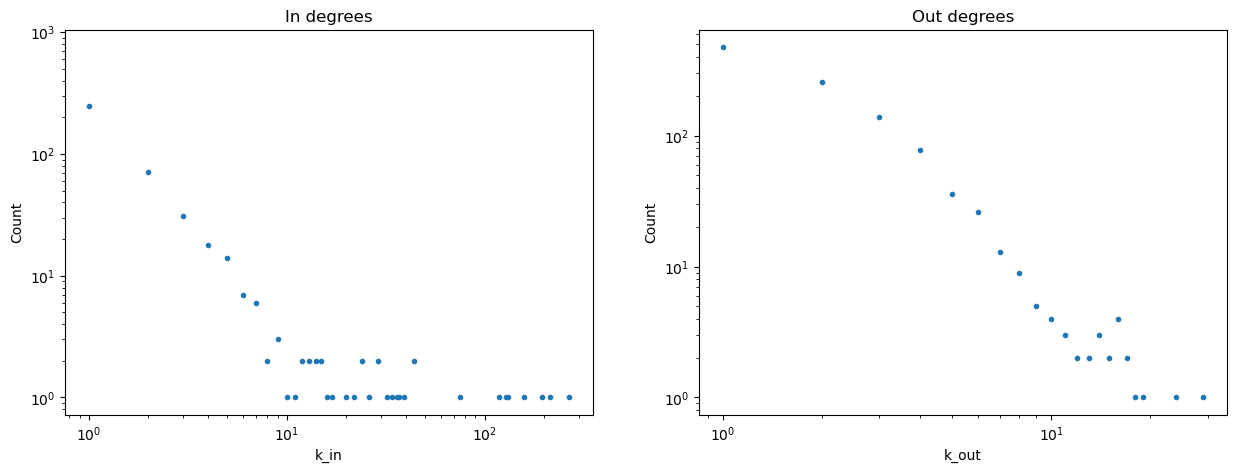

In [170]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(edges_in[:-1], hist_in, '.')
plt.title('In degrees')
plt.xlabel('k_in')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(edges_out[:-1], hist_out, '.')
plt.title('Out degrees')
plt.xlabel('k_out')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')

plt.show()

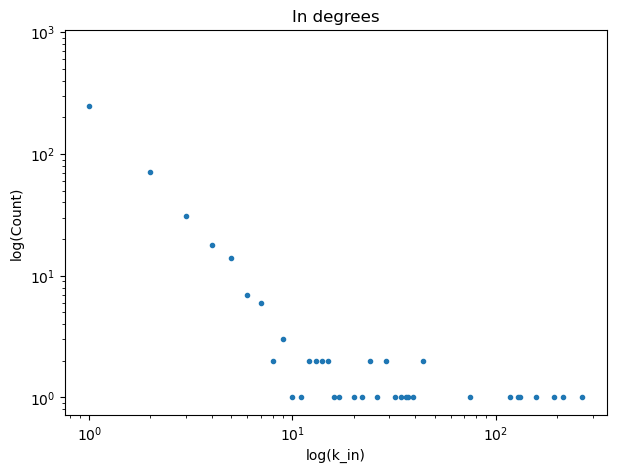

In [180]:
fig = plt.figure(figsize=(7,5))

# plt.subplot(1,2,1)
plt.plot(edges_in[:-1], hist_in, '.')
plt.title('In degrees')
plt.xlabel('log(k_in)')
plt.ylabel('log(Count)')
plt.xscale('log')
plt.yscale('log')

plt.savefig('in_degrees_log.png')
plt.show()

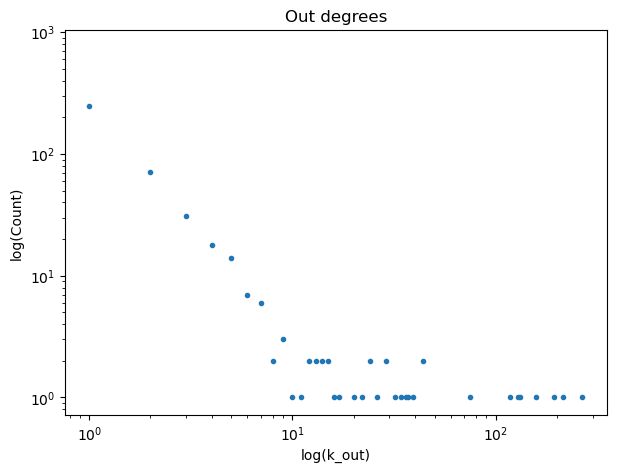

In [181]:
fig = plt.figure(figsize=(7,5))

# plt.subplot(1,2,1)
plt.plot(edges_in[:-1], hist_in, '.')
plt.title('Out degrees')
plt.xlabel('log(k_out)')
plt.ylabel('log(Count)')
plt.xscale('log')
plt.yscale('log')

plt.savefig('out_degrees_log.png')
plt.show()

Who are the most referred to characters? Who are the characters that have to most out going edges? Also the same for the min values of the degrees:

In [133]:
# First, sort the corresponding degree distribution dictionaries
in_degrees_dict = dict(sorted(in_degrees_dict.items(), key=lambda x: x[1], reverse=True))
out_degrees_dict = dict(sorted(out_degrees_dict.items(), key=lambda x: x[1], reverse=True))

From knowing that the character `The Boys` refers to `Cartman`, `Kyle`, `Stan` and if alive, `Kenny`, we add all the corresponding degrees of `The Boys` character to these characters. `Butters` briefly replaced `Kenny` while the latter was dead, but we choose to not add to `Butters`, in a similar spirit to the series.


In [134]:
characters_to_add_degrees_to = ['Eric Cartman', 'Stan Marsh', 'Kyle Broflovski', 'Kenny McCormick']

# For the out degrees
for character in out_degrees_dict.keys():
    if character=='The Boys':
        val_to_add = out_degrees_dict[character]
        for name in characters_to_add_degrees_to:
            out_degrees_dict[name] += val_to_add
            print(f"Added {val_to_add} out degrees to {name}")

del out_degrees_dict['The Boys']

Added 3 out degrees to Eric Cartman
Added 3 out degrees to Stan Marsh
Added 3 out degrees to Kyle Broflovski
Added 3 out degrees to Kenny McCormick


In [135]:
# For the in degrees
for character in in_degrees_dict.keys():
    if character=='The Boys':
        val_to_add = in_degrees_dict[character]
        for name in characters_to_add_degrees_to:
            in_degrees_dict[name] += val_to_add
            print(f"Added {val_to_add} in degrees to {name}")

del in_degrees_dict['The Boys']

Added 129 in degrees to Eric Cartman
Added 129 in degrees to Stan Marsh
Added 129 in degrees to Kyle Broflovski
Added 129 in degrees to Kenny McCormick


In [166]:

sorted_in_degree_dict = dict( sorted( in_degrees_dict.items(), key=lambda x: x[1], reverse=True ) )
sorted_out_degree_dict = dict( sorted( out_degrees_dict.items(), key=lambda x: x[1], reverse=True ) )


top_n = 40
# Most in degrees. Or otherwise, the character that most of the others characters involve in their stories
print("In-degree:\n")
print('Highest:')
for character in list(sorted_in_degree_dict.keys())[:top_n]:
    print(character, sorted_in_degree_dict[character])

print()

print("Out-degree:\n")
print('Highest:')
for character in list(sorted_out_degree_dict.keys())[:top_n]:
    print(character, out_degrees_dict[character])
    
# Fewest in degrees. Or otherwise, the character that most of the others characters involve in their stories
print("In-degree:\n")
print('Lowest:')
for character in list(sorted_in_degree_dict.keys())[-top_n:]:
    print(character, sorted_in_degree_dict[character])

print()

print("Out-degree:\n")
print('Lowest:')
for character in list(sorted_out_degree_dict.keys())[-top_n:]:
    print(character, out_degrees_dict[character])

In-degree:

Highest:
Eric Cartman 397
Kyle Broflovski 343
Stan Marsh 323
Kenny McCormick 247
Butters Stotch 158
Herbert Garrison 132
Randy Marsh 75
Clyde Donovan 44
Jerome "Chef" McElroy 44
Tolkien Black 39
Jimmy Valmer 37
Wendy Testaburger 36
The 4th Grade 34
Liane Cartman 32
Craig Tucker 29
The 6th Graders 29
Timmy Burch 26
Ike Broflovski 24
Sharon Marsh 24
The Coon (Character) 22
Bebe Stevens 20
Heidi Turner 17
Jesus Christ 16
Jimbo Kern 15
South Park Vampire Society 15
Sheila Broflovski 14
Tweek Tweak 14
Dr. Alphonse Mephesto 13
Gerald Broflovski 13
Nichole Daniels 12
Stephen Stotch 12
Federal Bureau of Investigation 11
Rick and Susan Tyler 10
Karen McCormick 9
Kindergartners 9
Pip Pirrip 9
Mabel Cartman 8
Mayor McDaniels 8
Barack Obama 7
Douchebag 7

Out-degree:

Highest:
Eric Cartman 33
Kyle Broflovski 27
Stan Marsh 20
Heidi Turner 19
Kenny McCormick 19
Butters Stotch 18
Randy Marsh 17
Clyde Donovan 16
Tolkien Black 16
Wendy Testaburger 16
Herbert Garrison 15
Lola 15
Annie Knitts

Community detection using the Louvain algorithm.

In [137]:
import community

In [138]:
partition = community.best_partition(G_weakly_con.to_undirected(), random_state=1337)

In [139]:
print(f"{len(set(partition.values()))} communities identified")

19 communities identified


We can eyeball who is in each community.

In [140]:
# First 'invert' the partition dictionary. Keys are communities, values is a list of characters
communities_dict = {}

for character, comm in partition.items():
    communities_dict[comm] = communities_dict.get(comm, []) + [character]

In [165]:
communities_dict

{0: ['Eric Cartman',
  'Adolf Hitler',
  'Alan the Security Guard',
  'Alana Thompson',
  'Alexandra Cartman',
  'Alice',
  "Alice's Parents",
  'Anderson Cooper',
  'Benjamin Franklin',
  'Best Buy President',
  "Beth (Dawg's Bitch)",
  'Bill Cosby (BSM-471)',
  'Boy with Huge Glasses ("Probably")',
  "Cartman's Father (Unaired Pilot)",
  "Cartman's Sister (Unaired Pilot)",
  "Cartman's Unnamed Relatives",
  'Cesar Millan',
  'Chad',
  'Chad\'s Parents ("Fat Camp")',
  'Chief Running Water',
  'Chief Stevens',
  'Chuck Chuck',
  'Cinderella',
  'Colonel Sanders',
  'Cosette',
  'Cowboy Doctors',
  'Darryl Weathers',
  'Doctor Vosknocker',
  'DogPoo Petuski',
  'Dr. Doctor',
  'Dr. Stevens',
  'Dr. Zonder',
  'Elin Nordegren',
  'Elise Garrett',
  'Elvin Cartman',
  'Faith Records CEO',
  'Florence Cartman',
  'Foreman',
  'Frances Velman',
  'Frank Fun',
  'Fred Cartman',
  'Harold Cartman',
  'Harrison Yates',
  'Hopeful Hills Campers',
  'Horace Sanders',
  'Howard Cartman',
  'Jack

In [141]:
modularity = community.modularity(partition, G_weakly_con.to_undirected())
print(f"The modularity for the best partition is: {np.round(modularity,3)}")

The modularity for the best partition is: 0.521


The modularity value looks high. The members of each identified community of this partition could actually form real communities.  
We can visualize these communities, as in the following cell

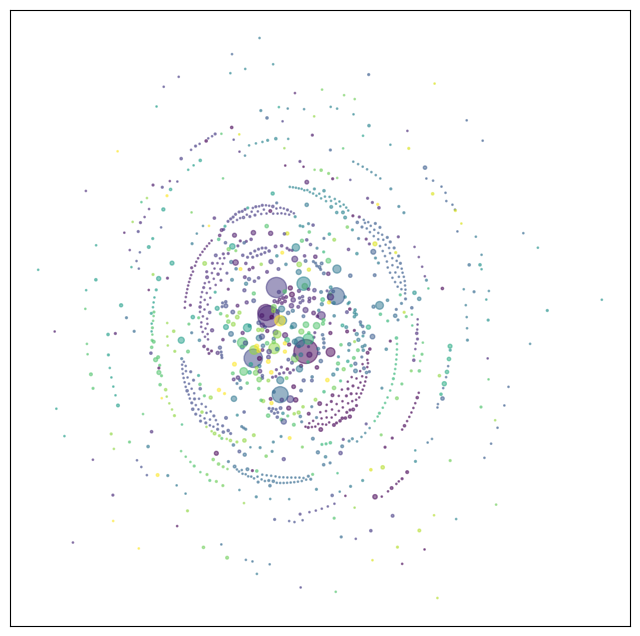

In [142]:
fig = plt.figure(figsize=(8,8))

node_options = {
    'node_size': in_degrees+out_degrees,
    'node_color': list(partition.values()),
    'alpha':0.5,
}

pos = pos = nx.kamada_kawai_layout(G_weakly_con.to_undirected())
nx.draw_networkx_nodes(G_weakly_con.to_undirected(), pos=pos, **node_options)

In [143]:
from fa2 import ForceAtlas2

In [144]:
# Set the parameters to tune for the ForceAtlas2 algorithm
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=30.0,
                        strongGravityMode=False,
                        gravity=220.0,

                        # Log
                        verbose=True
                        )

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:59<00:00, 33.66it/s]


BarnesHut Approximation  took  12.12  seconds
Repulsion forces  took  45.02  seconds
Gravitational forces  took  0.28  seconds
Attraction forces  took  0.10  seconds
AdjustSpeedAndApplyForces step  took  0.92  seconds


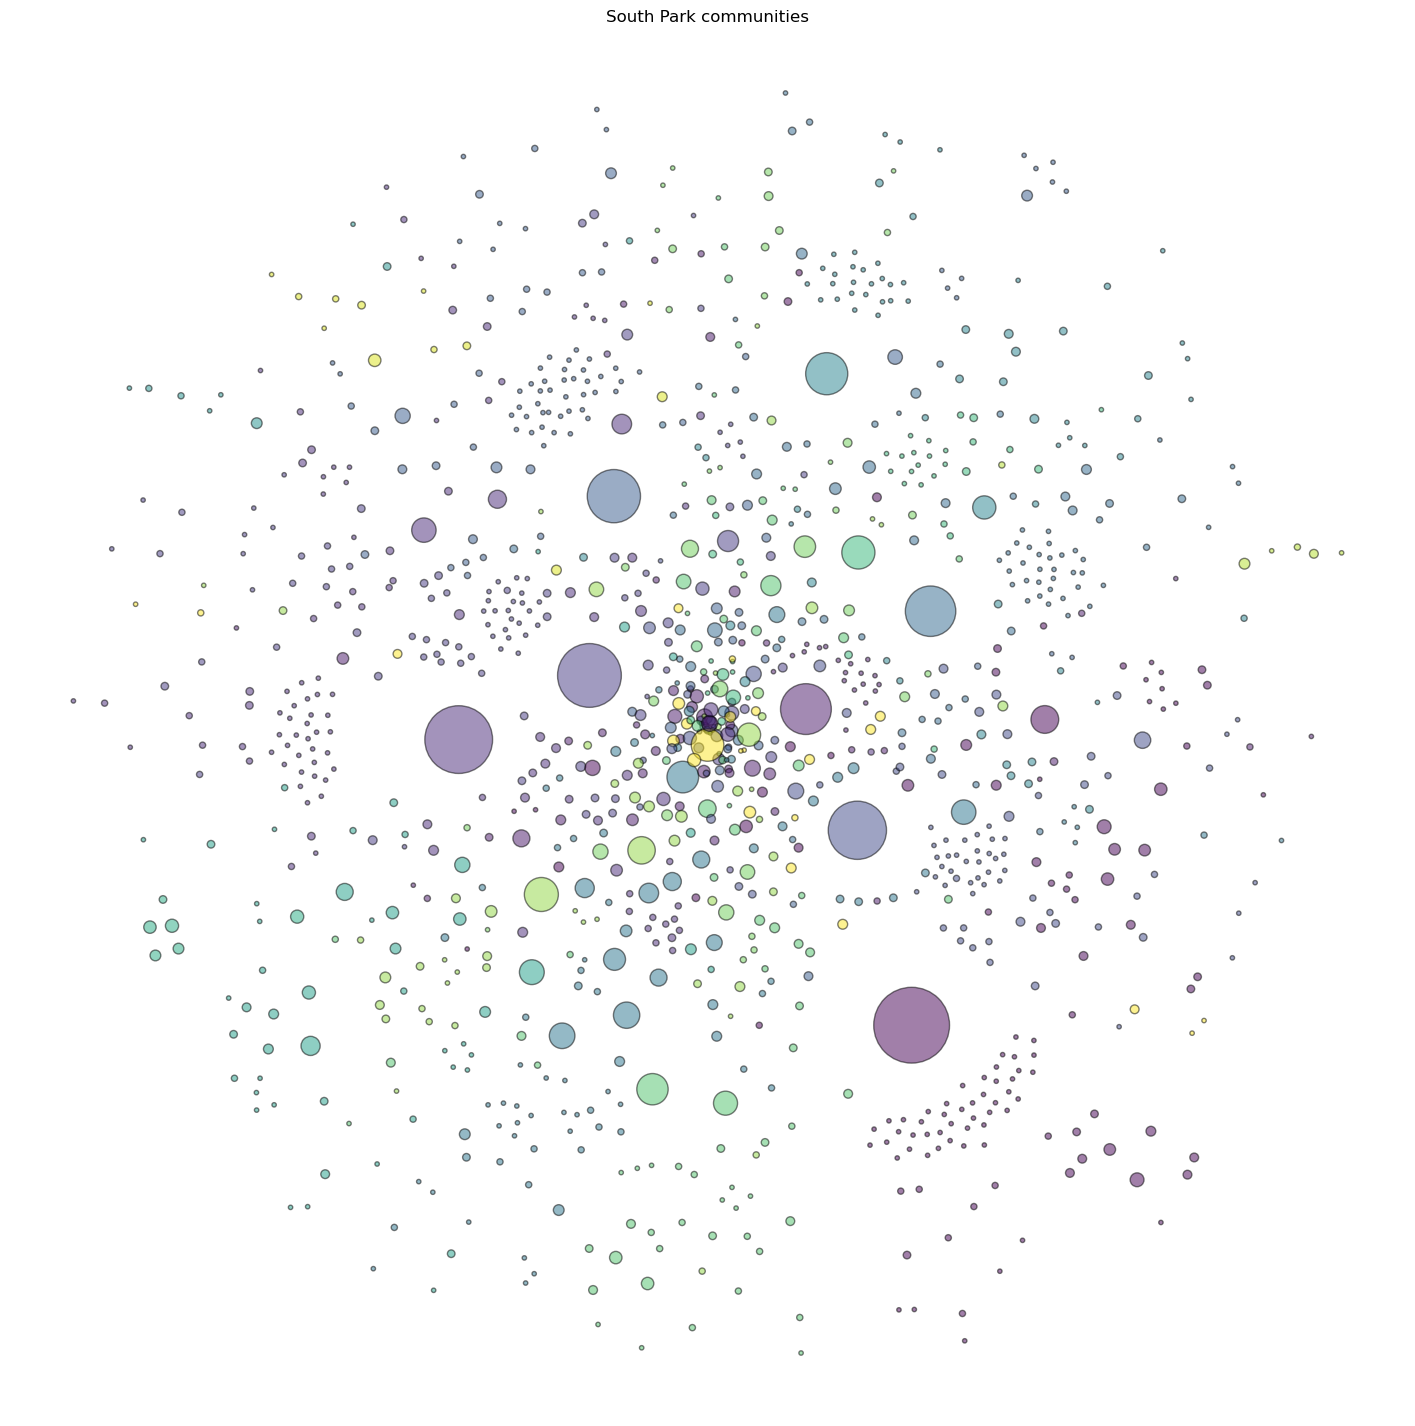

In [145]:

node_options = {
    'node_size': (in_degrees+out_degrees)*10,
    'node_color': list(partition.values()),
    'alpha':0.5,
}


iterations = 2000
fig = plt.figure(figsize=(18,18))
pos = forceatlas2.forceatlas2_networkx_layout(G_weakly_con.to_undirected(), pos=None, iterations=iterations)
nodes = nx.draw_networkx_nodes(G_weakly_con.to_undirected(), pos=pos, **node_options)
nodes.set_edgecolor('k')
# nx.draw_networkx_edges(G_weak, pos=pos,  edge_color=color_map_edges)


plt.title('South Park communities')
plt.axis('off')

plt.show()

In [149]:
from pyvis.network import Network

In [163]:
net = Network(notebook=True, width='1000px', height='1000px')
net.from_nx(G_weakly_con)

for node in net.get_nodes():
    net.get_node(node)['physics']=False
    net.get_node(node)['label']=str(node)

net.toggle_physics(False)
net.show('south_park_large.html')


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:59<00:00, 33.48it/s]


BarnesHut Approximation  took  12.35  seconds
Repulsion forces  took  45.01  seconds
Gravitational forces  took  0.24  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.89  seconds


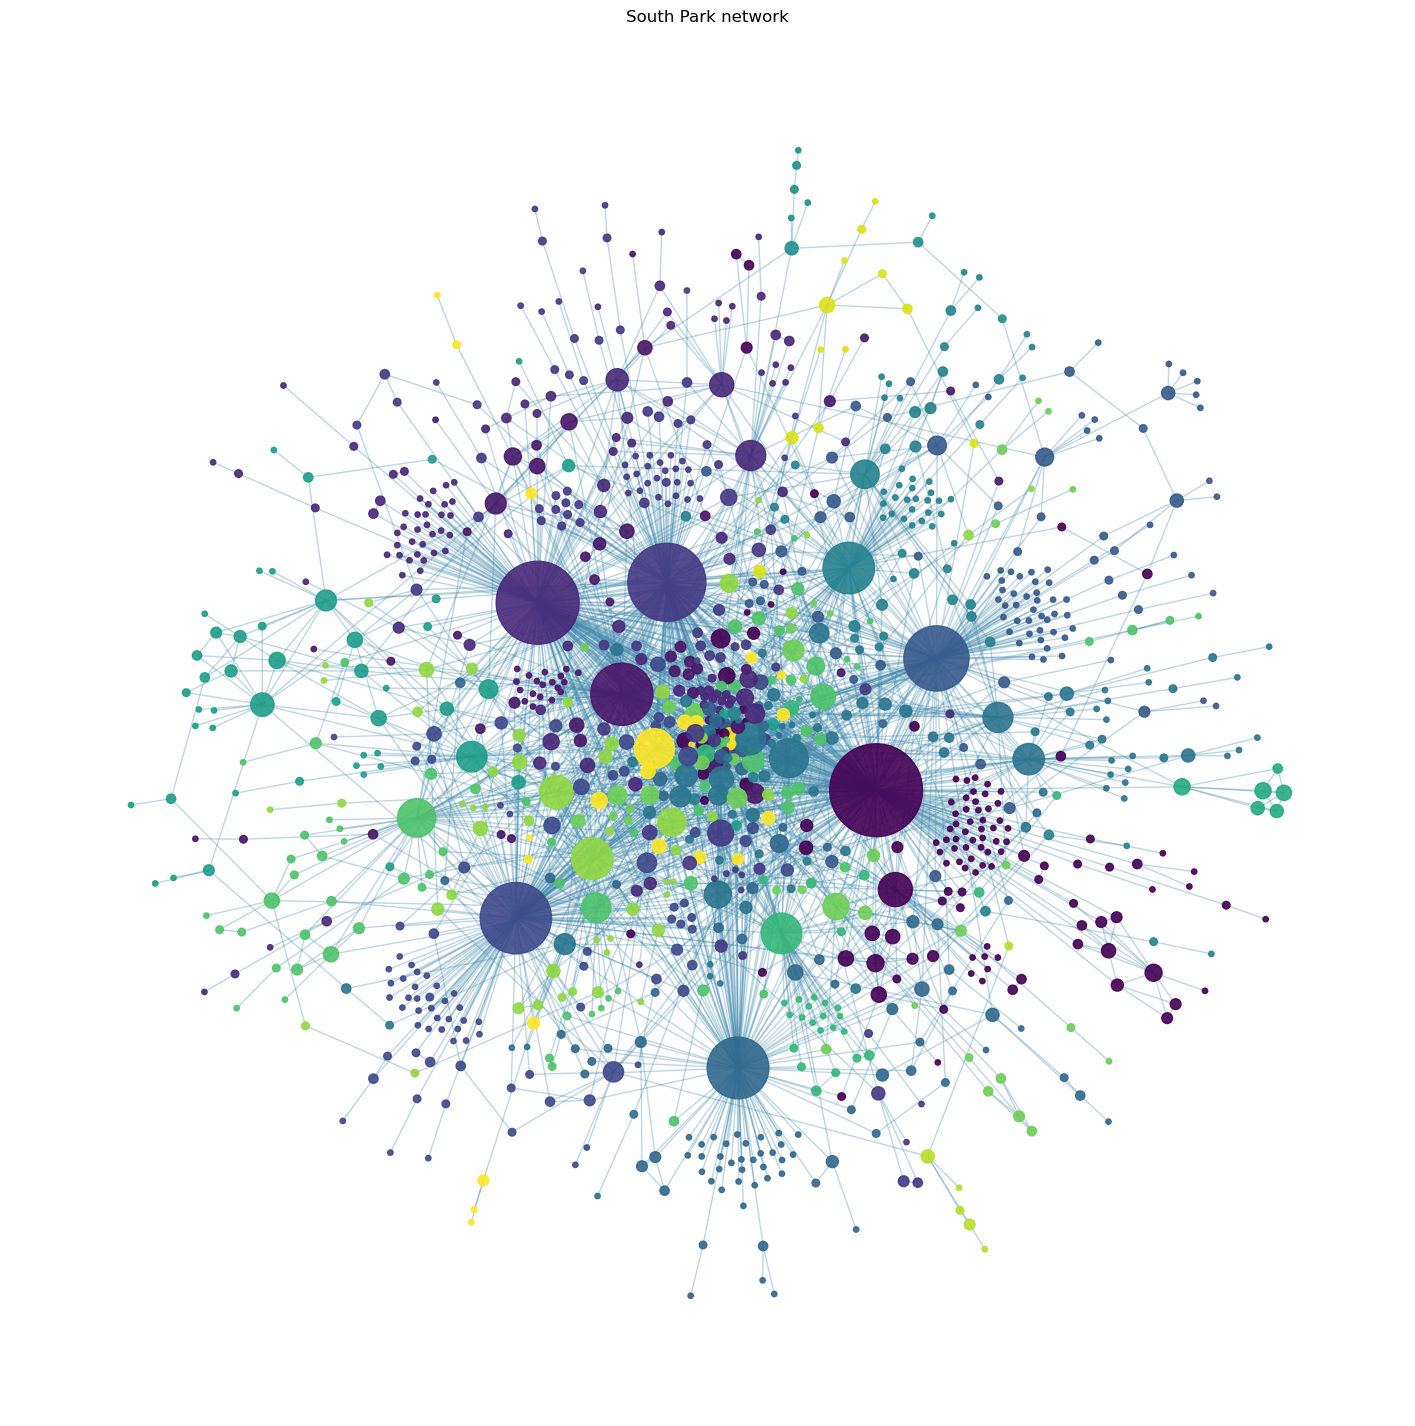

In [167]:

node_options = {
    'node_size': (in_degrees+out_degrees)*15,
    'node_color': list(partition.values()),
    'alpha':0.9,
}


iterations = 2000
fig = plt.figure(figsize=(18,18))
pos = nx.kamada_kawai_layout(G_weakly_con.to_undirected())

pos = forceatlas2.forceatlas2_networkx_layout(G_weakly_con.to_undirected(), pos=pos, iterations=iterations)
nodes = nx.draw_networkx_nodes(G_weakly_con.to_undirected(), pos=pos, **node_options)
# nodes.set_edgecolor('k')
nx.draw_networkx_edges(G_weakly_con.to_undirected(), pos=pos, alpha=0.34, edge_color='#3f88ab')


plt.title('South Park network')
plt.axis('off')

plt.savefig('south_park_nx_draw3.png')
plt.show()